# 机器学习建模与调优 

![](./sklearn.jpeg)


## 一、招聘数据的建模：GBDT

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./lagou_featured.csv', encoding='utf-8', index_col=0)
df.shape

(1650, 60)

In [4]:
pd.options.display.max_columns = 999
df.head()

,salary,Python,R,SQL,Excel,Java,Linux,C++,Spark,Tensorflow,上海,其他,北京,南京,广州,成都,杭州,武汉,深圳,O2O,企业服务,信息安全,其他.1,医疗健康,教育,数据服务,电子商务,硬件,移动互联网,金融,不限,博士,大专,本科,硕士,数据分析师,数据挖掘工程师,机器学习工程师,深度学习工程师,15-50人,150-500人,2000人以上,50-150人,500-2000人,少于15人,A轮,B轮,C轮,D轮及以上,上市公司,不需要融资,天使轮,未融资,1-3年,10年以上,1年以下,3-5年,5-10年,不限.1,应届毕业生
0,15000.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,32500.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,12500.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,11500.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


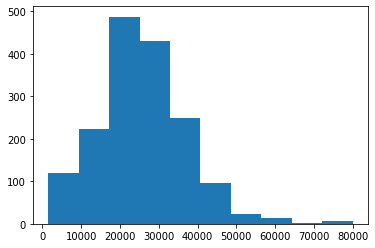

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['salary'])
plt.show();

In [6]:
X = df.drop(['salary'], axis=1).values
y = df['salary'].values.reshape((-1, 1))
print(X.shape, y.shape)

(1650, 59) (1650, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1155, 59) (1155, 1) (495, 59) (495, 1)


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)
model.fit(X_train, y_train)

D:\Python\python3.8\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5)

In [9]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

8619.33999253608


In [10]:
print(y_pred[:10])

[26637.73031959  8260.11665091 28255.12203481 34143.65810233
 15703.17313026 33785.35352318 30643.42935171 12362.51225793
 25265.85438112 14616.97183903]


In [11]:
print(y_test[:10].flatten())

[22500. 10000. 25000. 40000. 13500. 25000. 42500.  3500. 30000. 20000.]


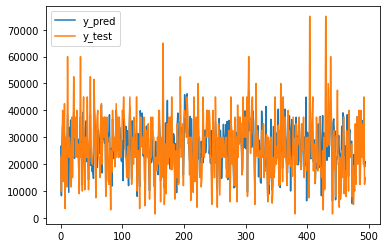

In [12]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['y_pred', 'y_test'])
plt.show();

In [14]:
# 目标变量对数化处理
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.3, random_state=42)
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

D:\Python\python3.8\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42826321751492225


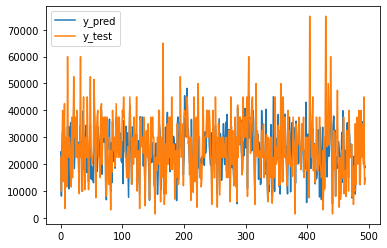

In [15]:
plt.plot(np.exp(y_pred))
plt.plot(np.exp(y_test))
plt.legend(['y_pred', 'y_test'])
plt.show();

## 二、招聘数据建模：XGBoost

In [ ]:
!python -m pip install  xgboost

In [ ]:
import xgboost as xgb
xg_train = xgb.DMatrix(X, y)

params = {
        'eta': 0.01, 
        'max_depth': 6, 
        'subsample': 0.9, 
        'colsample_bytree': 0.9, 
        'objective': 'reg:linear', 
        'eval_metric': 'rmse', 
        'seed': 99, 
        'silent': True
    }
cv = xgb.cv(params, xg_train, 1000, nfold=5, early_stopping_rounds=800, verbose_eval=100)

## 三、招聘数据建模：lightGBM

In [50]:
X = df.drop(['salary'], axis=1).values
y = np.log(df['salary'].values.reshape((-1, 1))).ravel()
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mse', mean_squared_error(np.exp(preds), np.exp(labels))

params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'sub_feature': 0.7,
    'num_leaves': 17,
    'colsample_bytree': 0.7,
    'feature_fraction': 0.7,
    'min_data': 100,
    'min_hessian': 1,
    'verbose': -1,
}

print('begin cv 5-fold training...')
scores = []
start_time = time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=27)
for i, (train_index, valid_index) in enumerate(kf.split(X)):
    print('Fold', i+1, 'out of', 5)
    X_train, y_train = X[train_index], y[train_index]
    X_valid, y_valid = X[valid_index], y[valid_index]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid)
    model = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_valid,
                verbose_eval=200,
#                feval=evalerror,
               early_stopping_rounds=1000)
#     feat_importance = pd.Series(model.feature_importance(), index=X.columns).sort_values(ascending=False)
#     test_preds[:, i] = model.predict(lgb_valid)
# print('outline score：{}'.format(np.sqrt(mean_squared_error(y_pred, valid_pred)*0.5)))
print('cv training time {} seconds'.format(time.time() - time_start))